Initial Clean

Remember that the encoding was specified due to special characters

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv(
    "../data/raw/Sample - Superstore.csv",
    encoding="latin1"
)

# Preview data
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [ ]:
# Stating number of rows and columns, describing the data types, and showing how many missing values there are.
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [3]:
# Convert date columns from Object to DateTime
df["Order Date"] = pd.to_datetime(df["Order Date"])
df["Ship Date"] = pd.to_datetime(df["Ship Date"])

In [4]:
# Convert Post Code to string to prevent numerical issues
df["Postal Code"] = df["Postal Code"].astype(str)


In [ ]:
# Confirm conversion to DateTime via the data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   object        
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [6]:
# Standardising column names for ease of quotation and analysis

df.columns = (
    df.columns
      .str.lower()
      .str.replace(" ", "_")
      .str.replace("-", "_")
)

In [7]:
# Converting various columns to categories for easier analytics down the line
cat_cols = ["region","category","segment","ship_mode","sub_category"]

for c in cat_cols:
    df[c] = df[c].astype("category")

In [8]:
# Confirm conversion to objet via the data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   row_id         9994 non-null   int64         
 1   order_id       9994 non-null   object        
 2   order_date     9994 non-null   datetime64[ns]
 3   ship_date      9994 non-null   datetime64[ns]
 4   ship_mode      9994 non-null   category      
 5   customer_id    9994 non-null   object        
 6   customer_name  9994 non-null   object        
 7   segment        9994 non-null   category      
 8   country        9994 non-null   object        
 9   city           9994 non-null   object        
 10  state          9994 non-null   object        
 11  postal_code    9994 non-null   object        
 12  region         9994 non-null   category      
 13  product_id     9994 non-null   object        
 14  category       9994 non-null   category      
 15  sub_category   9994 n

In [ ]:
# Generate Year and Month date columns for Ship Date and Order Date

df["order_year"] = df["order_date"].dt.year
df["order_month"] = df["order_date"].dt.month
df["ship_year"] = df["ship_date"].dt.year
df["ship_month"] = df["ship_date"].dt.month


In [ ]:
# Confirm generation of month, year for Shipping and Orders
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   row_id         9994 non-null   int64         
 1   order_id       9994 non-null   object        
 2   order_date     9994 non-null   datetime64[ns]
 3   ship_date      9994 non-null   datetime64[ns]
 4   ship_mode      9994 non-null   category      
 5   customer_id    9994 non-null   object        
 6   customer_name  9994 non-null   object        
 7   segment        9994 non-null   category      
 8   country        9994 non-null   object        
 9   city           9994 non-null   object        
 10  state          9994 non-null   object        
 11  postal_code    9994 non-null   object        
 12  region         9994 non-null   category      
 13  product_id     9994 non-null   object        
 14  category       9994 non-null   category      
 15  sub_category   9994 n

In [11]:
# Summary statistics - mean, median and standard deviation.
df[["sales","profit","quantity","discount"]].agg(["mean","median","std"])
 

,sales,profit,quantity,discount
mean,229.858001,28.656896,3.789574,0.156203
median,54.490000,8.666500,3.000000,0.200000
std,623.245101,234.260108,2.225110,0.206452


<Axes: >

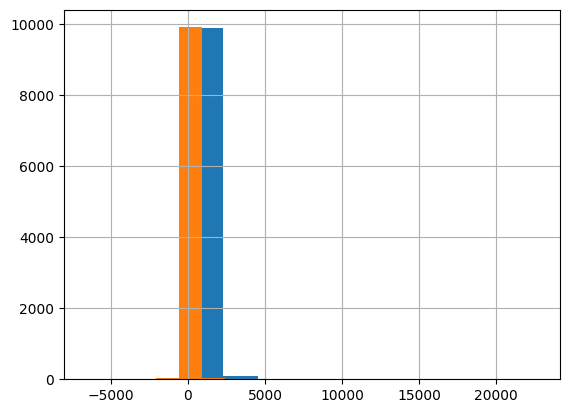

In [12]:
# Distribution plots
df["sales"].hist()
df["profit"].hist()

## Summary Statistics Interpretation

Summary statistics were calculated for sales, profit, quantity, and discount to understand central tendency and variability.

### Sales
The mean sales value (~230) is much higher than the median (~54), which indicates a strongly right-skewed distribution. This suggests that a small number of very large orders significantly increase the average. For business decisions, the median is therefore a more representative “typical order” value than the mean.

The very large standard deviation (~623) confirms high variability in order values, indicating uneven revenue distribution across transactions.

### Profit
Profit shows a similar skew pattern, with the mean (~28.7) notably higher than the median (~8.7). This implies that most orders generate relatively modest profit, while a smaller number of high-profit orders raise the average. The high standard deviation (~234) suggests inconsistent profitability, which may be influenced by discounting and product mix.

### Quantity
Order quantities are more stable, with mean (~3.8) close to median (3). This indicates lower skew and more consistent purchase sizes. The smaller standard deviation (~2.2) supports this interpretation.

### Discount
Discount levels show moderate spread. The median discount (0.20) is slightly higher than the mean (~0.16), suggesting that many orders include standard discount levels, with fewer extreme discount cases lowering the average. This is important because discount strategy likely has a measurable impact on profit variability.

### Business Implication
Overall, both sales and profit are highly skewed with high variability, meaning performance is driven by a relatively small number of large transactions. This supports the need for segmented analysis by category, region, and customer segment rather than relying only on overall averages.

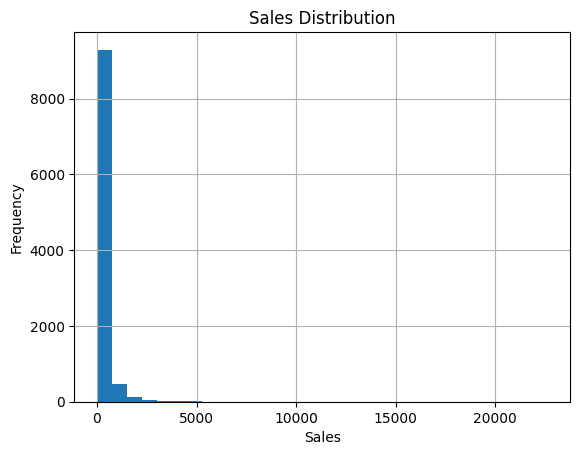

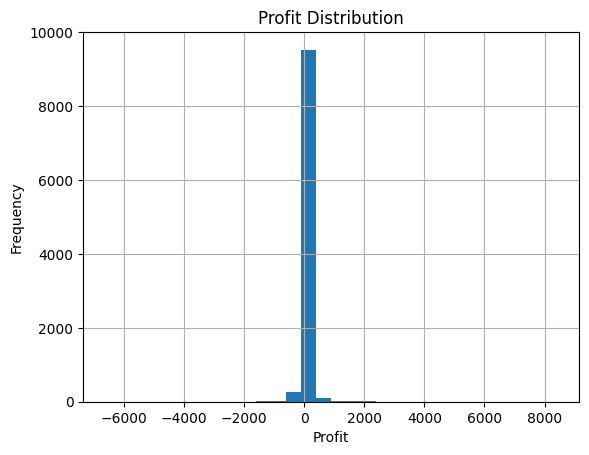

In [13]:


plt.figure()
df["sales"].hist(bins=30)
plt.title("Sales Distribution")
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.show()

plt.figure()
df["profit"].hist(bins=30)
plt.title("Profit Distribution")
plt.xlabel("Profit")
plt.ylabel("Frequency")
plt.show()

## Focused Category Counts

Counts were calculated for key business dimensions with low cardinality. High-cardinality identifier fields were excluded to avoid noisy, low-value outputs.

In [14]:
focused_cat_cols = [
    "ship_mode",
    "segment",
    "region",
    "category",
    "sub_category"
]

for col in focused_cat_cols:
    print("\n" + "="*40)
    print(f"Counts for {col}")
    print("="*40)
    print(df[col].value_counts())


Counts for ship_mode
ship_mode
Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: count, dtype: int64

Counts for segment
segment
Consumer       5191
Corporate      3020
Home Office    1783
Name: count, dtype: int64

Counts for region
region
West       3203
East       2848
Central    2323
South      1620
Name: count, dtype: int64

Counts for category
category
Office Supplies    6026
Furniture          2121
Technology         1847
Name: count, dtype: int64

Counts for sub_category
sub_category
Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: count, dtype: int64


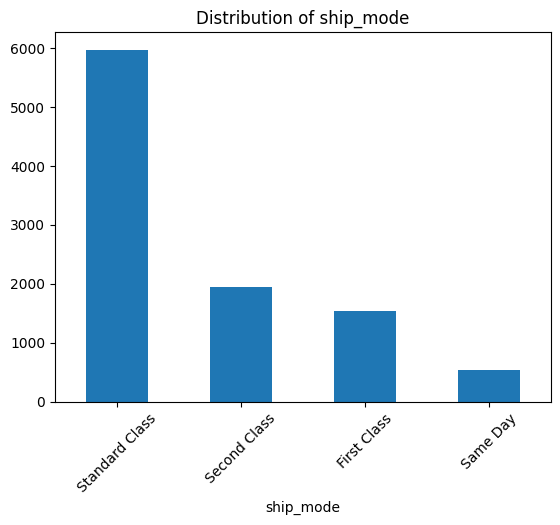

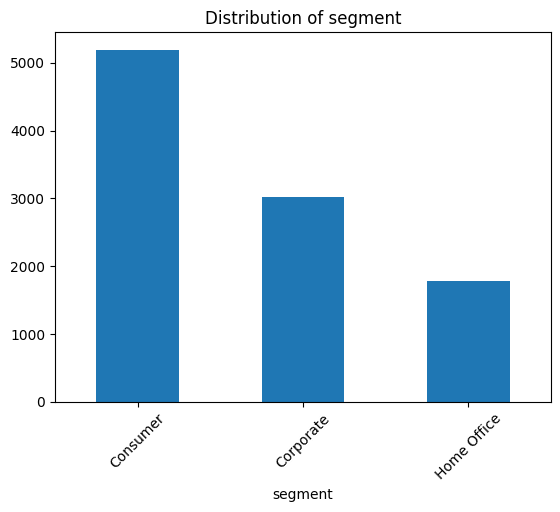

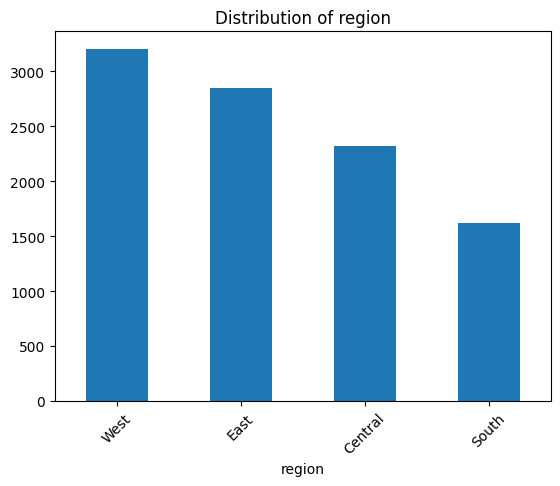

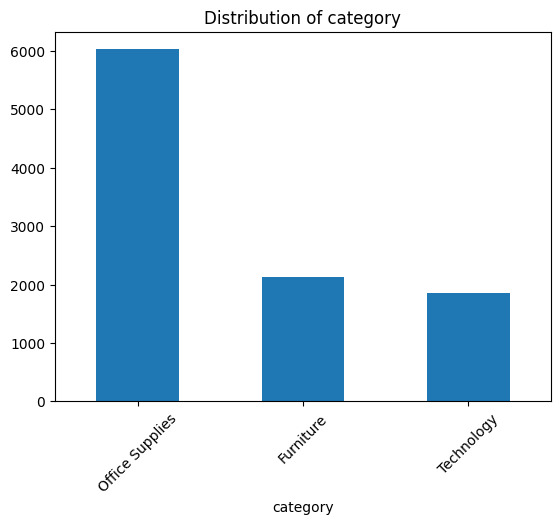

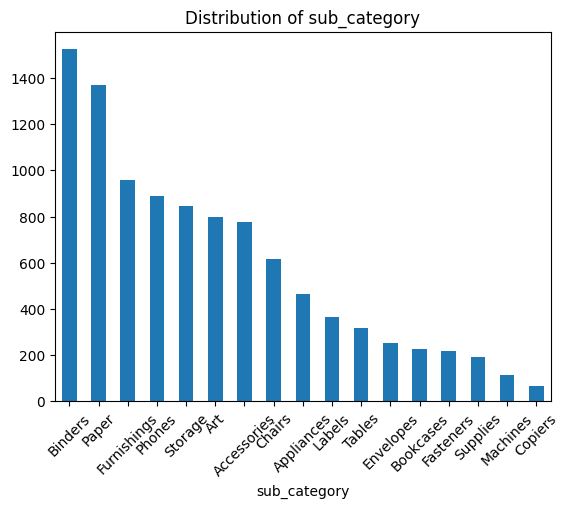

In [16]:
for col in focused_cat_cols:
    df[col].value_counts().plot(kind="bar")
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.show()

In [17]:
region_summary = df.groupby("region").agg(
    orders=("order_id","count"),
    total_sales=("sales","sum"),
    total_profit=("profit","sum"),
    avg_profit=("profit","mean")
).sort_values("total_profit", ascending=False)

region_summary


C:\Users\dunca\AppData\Local\Temp\ipykernel_32980\2182992038.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  region_summary = df.groupby("region").agg(


,orders,total_sales,total_profit,avg_profit
region,,,,
West,3203,725457.8245,108418.4489,33.849032
East,2848,678781.2400,91522.7800,32.135808
South,1620,391721.9050,46749.4303,28.857673
Central,2323,501239.8908,39706.3625,17.092709


In [18]:
category_summary = df.groupby("category").agg(
    orders=("order_id","count"),
    total_sales=("sales","sum"),
    total_profit=("profit","sum"),
    avg_profit=("profit","mean")
).sort_values("total_profit", ascending=False)

category_summary


C:\Users\dunca\AppData\Local\Temp\ipykernel_32980\2998472715.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  category_summary = df.groupby("category").agg(


,orders,total_sales,total_profit,avg_profit
category,,,,
Technology,1847,836154.0330,145454.9481,78.752002
Office Supplies,6026,719047.0320,122490.8008,20.327050
Furniture,2121,741999.7953,18451.2728,8.699327


In [19]:
segment_summary = df.groupby("segment").agg(
    orders=("order_id","count"),
    total_sales=("sales","sum"),
    total_profit=("profit","sum"),
    avg_profit=("profit","mean")
).sort_values("total_profit", ascending=False)

segment_summary


C:\Users\dunca\AppData\Local\Temp\ipykernel_32980\1394665398.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  segment_summary = df.groupby("segment").agg(


,orders,total_sales,total_profit,avg_profit
segment,,,,
Consumer,5191,1.161401e+06,134119.2092,25.836873
Corporate,3020,7.061464e+05,91979.1340,30.456667
Home Office,1783,4.296531e+05,60298.6785,33.818664
